In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('riceClassification.csv')

In [4]:
print(f'shape is {data.shape}')

shape is (18185, 12)


In [5]:
feature_names = data.columns
feature_names

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [6]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
data['Class'].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [9]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [10]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


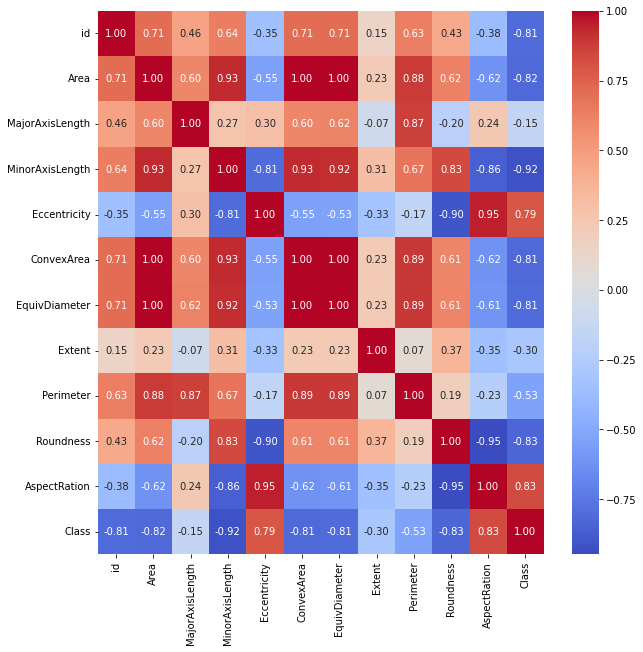

In [11]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

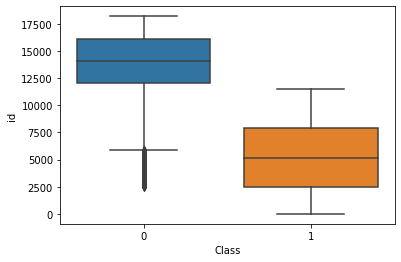

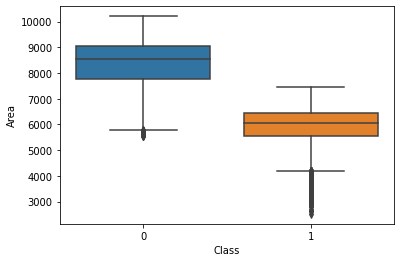

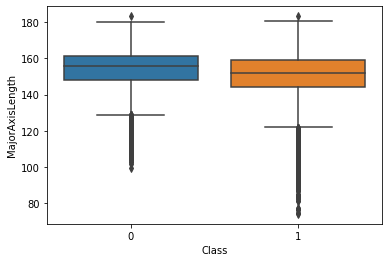

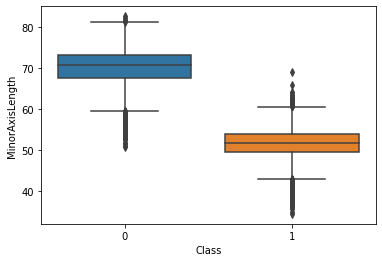

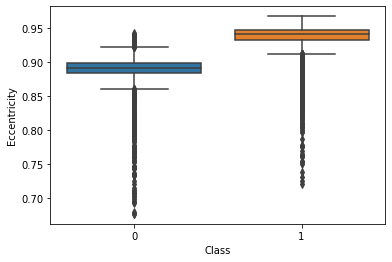

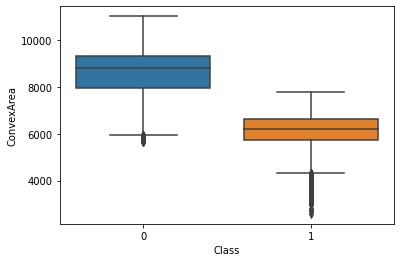

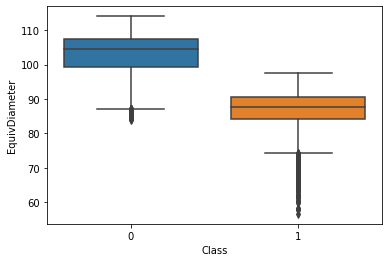

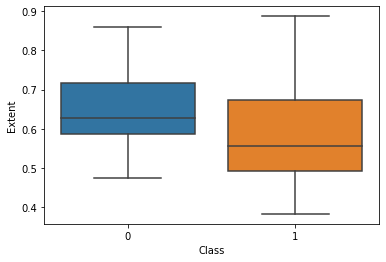

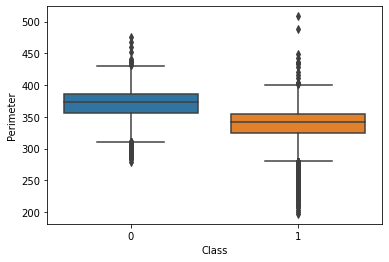

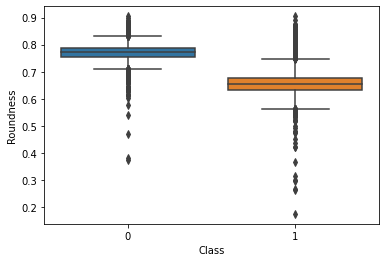

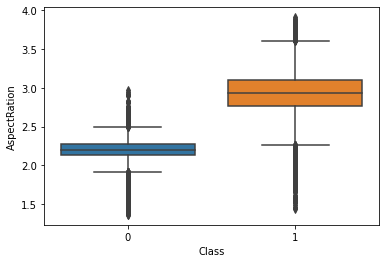

In [12]:
for i in range(len(feature_names[:-1])): #without column Class
    figure = plt.figure()
    ax = sns.boxplot(x='Class', y=feature_names[i], data=data)

In [13]:
features_plot = data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Class']]

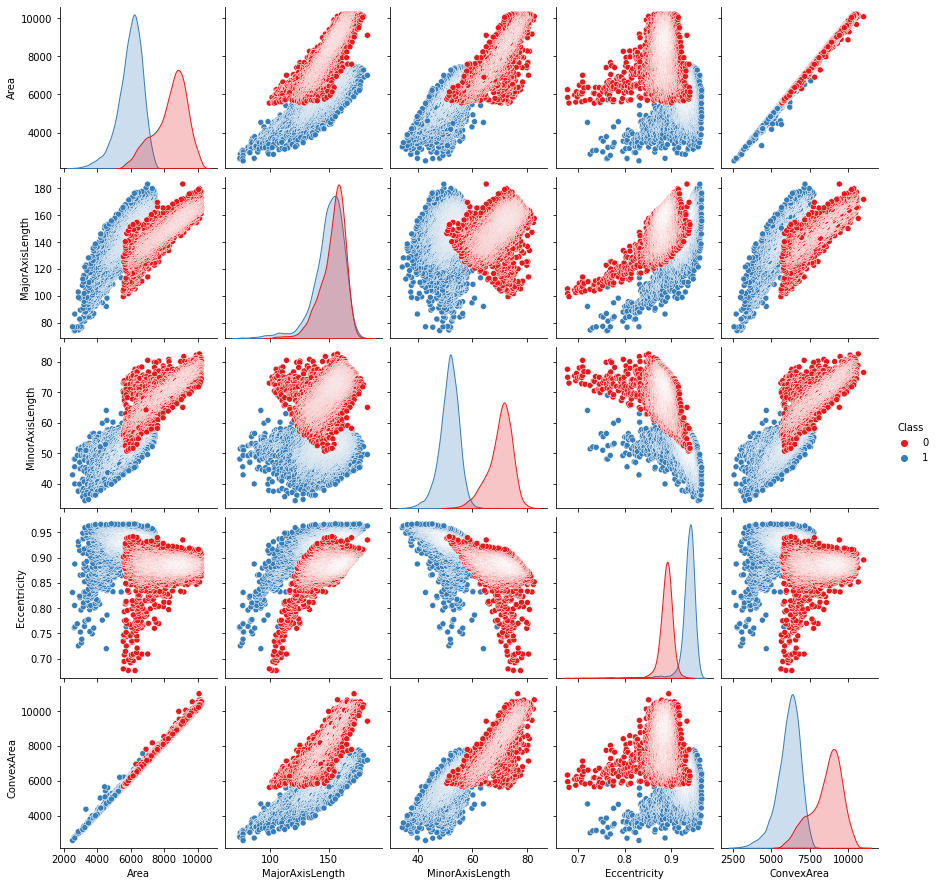

In [14]:
sns.pairplot(features_plot, hue="Class", palette = 'Set1')

In [15]:
x = data.drop(['id', 'Class'], 1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train) 
scaled_x_test = scaler.transform(x_test)

## knn

In [17]:
%%time
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train, y_train)
    pred_i = knn.predict(scaled_x_test)
    error.append(np.mean(pred_i != y_test))

CPU times: user 9.67 s, sys: 275 ms, total: 9.95 s
Wall time: 10.2 s


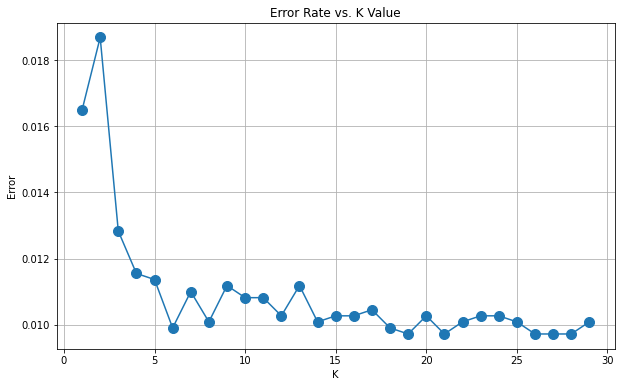

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()

In [19]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(scaled_x_train, y_train)
y_pred = knn.predict(scaled_x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2418   37]
 [  19 2982]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2455
           1       0.99      0.99      0.99      3001

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



## decison tree

In [20]:
parameter_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [5, 7, 12, 15, 20]}

grid_searcher = GridSearchCV(DecisionTreeClassifier(), parameter_grid)
grid_searcher.fit(scaled_x_train, y_train)
tree = grid_searcher.best_estimator_
 
print('Best params:', tree.get_params())

Best params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [21]:
y_pred = tree.predict(scaled_x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2455
           1       0.99      0.99      0.99      3001

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

[[2419   36]
 [  24 2977]]


In [22]:
tree_plot = DecisionTreeClassifier(max_depth=3)
tree_plot.fit(scaled_x_train, y_train)

DecisionTreeClassifier(max_depth=3)

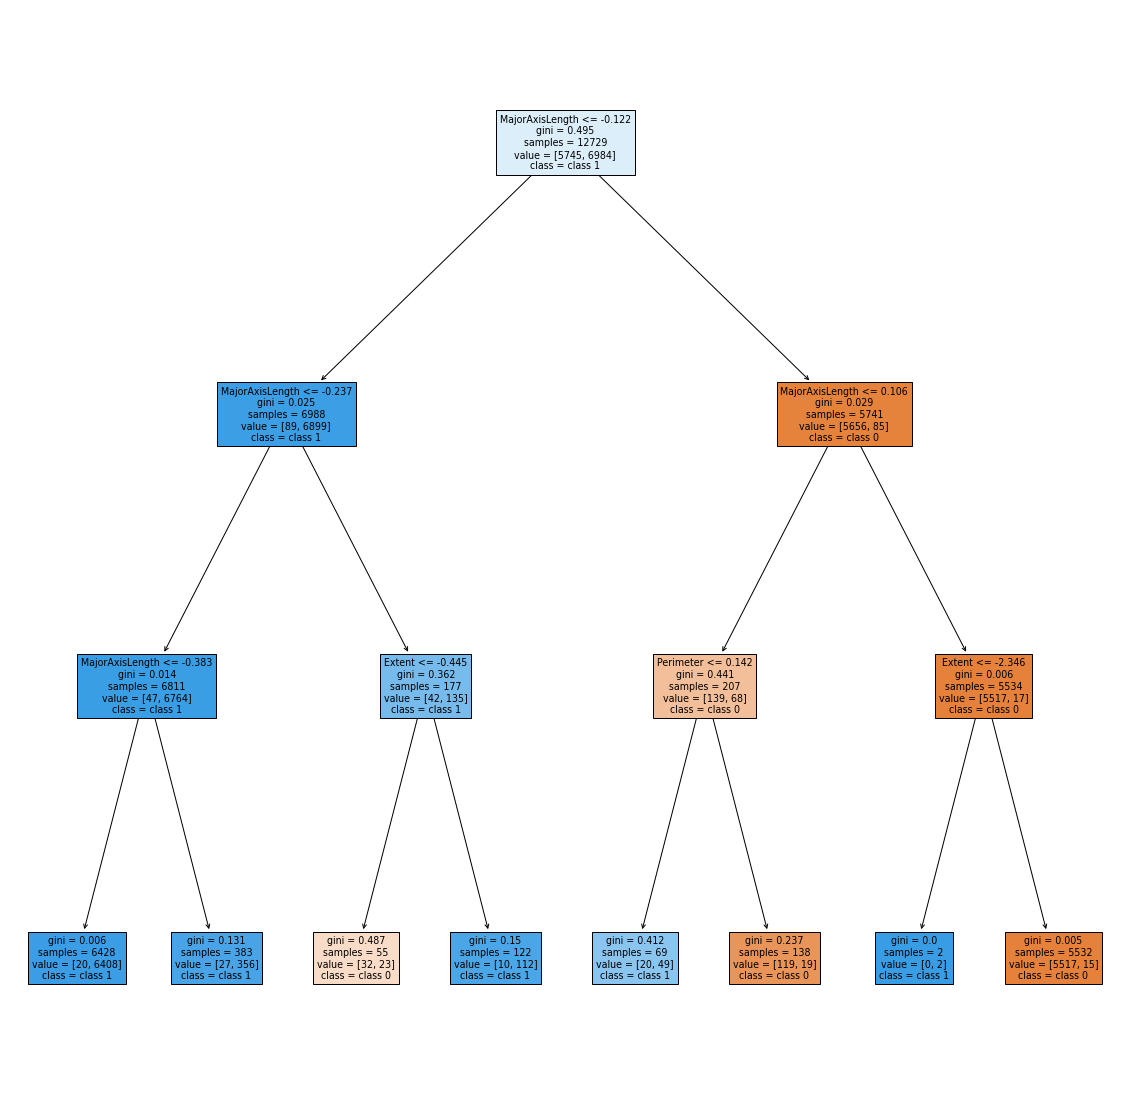

In [23]:
plt.figure(figsize = (20, 20))
plot_tree(tree_plot, feature_names=feature_names, class_names = ['class 0', 'class 1'], filled = True)
plt.show()

## SVM

In [24]:
parameter_grid = {'C': [1, 2, 3, 5, 6],
                  'gamma': ['scale', 'auto']}
grid_searcher = GridSearchCV(SVC(), parameter_grid)
grid_searcher.fit(scaled_x_train, y_train)
svm = grid_searcher.best_estimator_
 
print('Best params:', svm.get_params())

Best params: {'C': 6, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [25]:
y_pred = svm.predict(scaled_x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2455
           1       0.99      1.00      0.99      3001

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

[[2416   39]
 [  15 2986]]


## Random Forest

In [26]:
parameter_grid = {'n_estimators': [50, 150, 400, 800],
                 'max_depth': [5, 10, 15], 
                 'criterion': ['gini', 'entropy']}
grid_searcher = GridSearchCV(RandomForestClassifier(), parameter_grid, n_jobs=4)
grid_searcher.fit(scaled_x_train, y_train)
random_forest = grid_searcher.best_estimator_
 
print('Best params:', random_forest.get_params())

Best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [27]:
y_pred = random_forest.predict(scaled_x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2455
           1       0.99      0.99      0.99      3001

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

[[2416   39]
 [  21 2980]]


## AdaBoost

In [28]:
parameter_grid = {'base_estimator': [DecisionTreeClassifier(), SVC()],
                  'n_estimators': [5, 10, 15],
                  'learning_rate': [0.1, 0.2, 0.3]}
grid_searcher = GridSearchCV(AdaBoostClassifier(), parameter_grid, n_jobs=4)
grid_searcher.fit(scaled_x_train, y_train)
ada_boost = grid_searcher.best_estimator_

print('Best params:', ada_boost.get_params())

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 117, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 453, in _validate_estimator
    raise TypeError(
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Pl

Best params: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.1, 'n_estimators': 5, 'random_state': None}


In [29]:
y_pred = ada_boost.predict(scaled_x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2455
           1       0.99      0.99      0.99      3001

    accuracy                           0.98      5456
   macro avg       0.98      0.98      0.98      5456
weighted avg       0.98      0.98      0.98      5456

[[2411   44]
 [  44 2957]]
